# Linear Regression 
The objective of the least squares method is to find values of α and β that minimise the sum of the squared difference between Y and Yₑ. We will not go through the derivation here, but using calculus we can show that the values of the unknown parameters are as follows:
Beta = sum of (x item - mean of x)(y item - mean of y) / (x item - mean of x)
Alpha = mean of y -( beta * mean of x) 

where X̄ is the mean of X values and Ȳ is the mean of Y values.

If you are familiar with statistics, you may recognise β as simply
Cov(X, Y) / Var(X).

In [1]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Generate 'random' data
np.random.seed(0)
X = 2.5 * np.random.randn(100) + 1.5   # Array of 100 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 100 residual terms
y = 2 + 0.3 * X + res                  # Actual values of Y

# Create pandas dataframe to store our X and y values
df = pd.DataFrame(
    {'X': X,
     'y': y}
)

# Show the first five rows of our dataframe
df.head()


,X,y
0,5.910131,4.714615
1,2.500393,2.076238
2,3.946845,2.548811
3,7.102233,4.615368
4,6.168895,3.264107


In [6]:

# Calculate the mean of X and y
xmean = np.mean(X)
ymean = np.mean(y)

# Calculate the terms needed for the numator and denominator of beta
df['xycov'] = (df['X'] - xmean) * (df['y'] - ymean)

df['xvar'] = (df['X'] - xmean)**2
df['yvar'] = (df['y'] - ymean)**2

print(df['xvar'].sum())
print(df['yvar'].sum())

# Calculate beta and alpha
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')


634.891637009332
92.64217136894608
alpha = 2.0031670124623426
beta = 0.3229396867092763


In [11]:
# Yₑ = 2.003 + 0.323 X
# For example, if we had a value X = 10, we can predict that:
# Yₑ = 2.003 + 0.323 (10) = 5.233.

ypred = alpha + beta * X


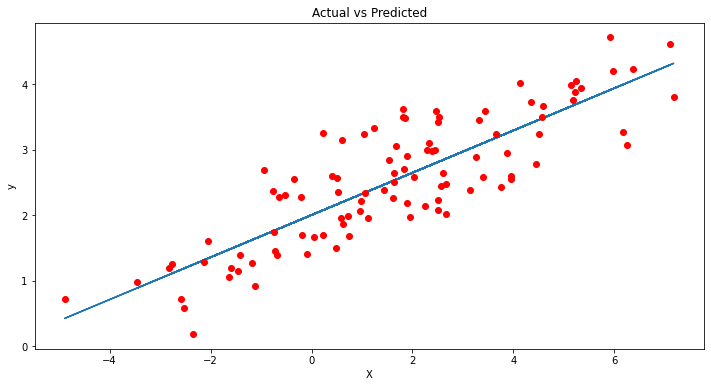

In [12]:
# Let’s plot our prediction ypred against the actual values of y,to get a better visual understanding of our model.

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)     # regression line
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

#  multiple linear regression model
Yₑ = α + β₁X₁ + β₂X₂ + … + βₚXₚ, where p is the number of predictors

In [17]:
# Import and display first five rows of advertising dataset
advert = pd.read_csv(r'C:\Users\Aryan.ABSALAN\MLGO\Advertising.csv', encoding="utf-8")
advert.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [21]:
from sklearn.linear_model import LinearRegression

# Build linear regression model using TV and Radio as predictors
# Split data into predictors X and output Y
# Also : 
# predictors = ['TV', 'Radio']
# X = advert[predictors]

X= advert[['TV', 'Radio']]
y = advert['Sales']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [22]:
# After building a model there is no need to calculate the values for alpha and betas ourselves.
# we just have to call 

# .intercept_ for alpha, and 
# .coef_ for an array with our coefficients beta1 and beta2

print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

# Sales = α + β₁*TV + β₂*Radio
# Sales = 2.921 + 0.046*TV + 0.1880*Radio.

alpha = 2.9210999124051362
betas = [0.04575482 0.18799423]


In [26]:
ypred = model.predict(X)
print(ypred)

[20.55546463 12.34536229 12.33701773 17.61711596 13.22390813 12.51208449
 11.71821241 12.10551553  3.7093792  12.55169696  7.0358597  17.25652015
 10.60866187  8.81095051 18.44466773 20.82891539 12.90386507 23.24107626
  9.94121476 14.15384619 18.12139161 14.74206357  6.51417168 16.54402663
  8.14035215 15.6080206  14.96769383 17.0463346  19.39954145  9.15929748
 21.64292187 11.35791808  7.65045928 18.83346334  7.56302763 16.99280099
 23.36720719 15.6258994   9.91257829 20.4405801  16.37872122 17.29870935
 21.5621537  13.96692266  8.9009974  15.16263814  8.88644967 21.69944046
 16.28690268  8.18162949 12.64569407  9.31962792 20.66180115 19.96126242
 20.35512357 21.30864743  8.53774783 12.76239488 21.89072858 18.10746914
  5.74497097 22.90418658 16.78413768 13.18474853 16.96570907  7.82652846
  8.98703456 12.02066194 18.95313425 21.09369037 17.78350693 10.63329605
 10.35113844  9.91334008 17.30983543 11.90970399  4.48014809 13.79239059
  8.78920329  9.67621401 11.43621364 14.6638809  10

In [27]:
new_X = [[300, 200]]
print(model.predict(new_X))

[54.24638977]
